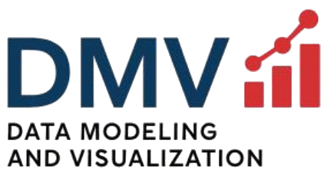

# **Time Series plots**
In this notebook, we will try to understand various plots and related techniques for time series visualization.

Let us import the necessary libraries and stock pricing dataset of Apple Inc. (AAPL) from Yahoo Finance.

In [36]:
try: # Import the package if already installed
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FuncFormatter
except: # Otherwise install the package first and then import
    !pip install matplotlib
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FuncFormatter
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
try:
    from plotnine import *
except:
    !pip install plotnine
    from plotnine import *

sns.set(style="whitegrid")
%matplotlib inline

# For using files stored in Google Drive
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)
# Now include the file path
folder_path = 'drive/MyDrive/DA209_DMV/'
file_name = 'AAPL.csv'

# Load the data:
df = pd.read_csv(folder_path+file_name,parse_dates=["Date"])

# Check if the data is loaded correctly
df.head(3)

Mounted at /content/drive


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094694,0.094694,0.094261,0.094261,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0


#### **Convert the date entries to required Date-Time format**

In [37]:
# Convert to datetime and normalize timezone
df["Date"] = pd.to_datetime(df["Date"], utc=True)

# Set as index
df = df.set_index("Date")

# Optional: sort
df = df.sort_index()

#### Add an additional column **year** in the DataFrame.

In [38]:
df["Year"] = df.index.year
df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year
Date,,,,,,,,
1980-12-12 05:00:00+00:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0,1980
1980-12-15 05:00:00+00:00,0.094694,0.094694,0.094261,0.094261,175884800,0.0,0.0,1980
1980-12-16 05:00:00+00:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0,1980


# **1. Scatter Plot in Time Series**

A simple scatter showing every daily closing point.


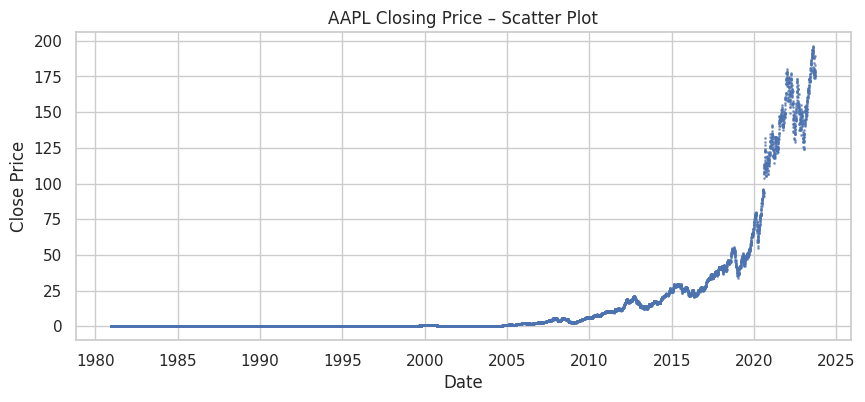

In [44]:
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df["Close"], alpha=0.6, s=1) #s 5 15
plt.title("AAPL Closing Price – Scatter Plot")
plt.xlabel("Date"); plt.ylabel("Close Price")
plt.show()


# **2.1 Line Graph: Without Dots**

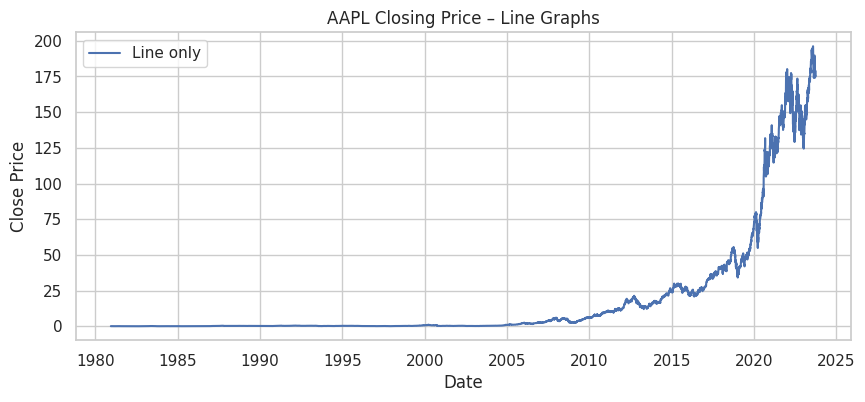

In [45]:
plt.figure(figsize=(10, 4))
# Without dots
plt.plot(df.index, df["Close"], color="C0", label="Line only")
# With dots
#plt.plot(df.index, df["Close"], linestyle="-", marker="o", markersize=3,
#         color="C1", alpha=0.6, label="Line + dots")
plt.title("AAPL Closing Price – Line Graphs")
plt.xlabel("Date"); plt.ylabel("Close Price")
plt.legend()
plt.show()


# **2.2 Line Graph: With Dots**

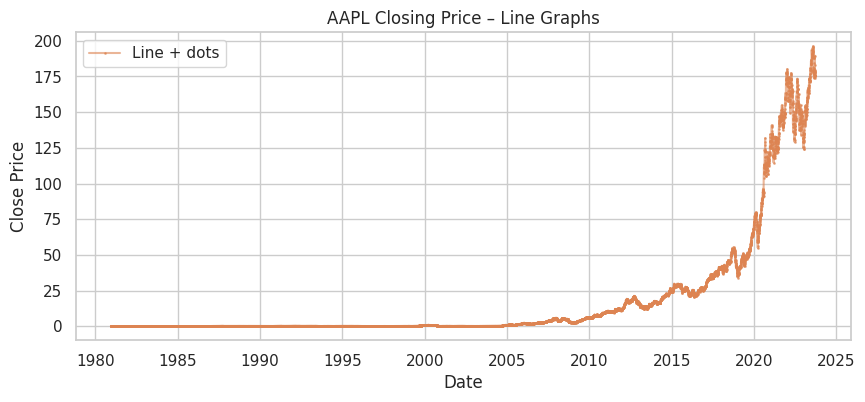

In [47]:
plt.figure(figsize=(10, 4))
# Without dots
#plt.plot(df.index, df["Close"], color="C0", label="Line only")
# With dots
plt.plot(df.index, df["Close"],marker="o", markersize=1,
         color="C1", alpha=0.6, label="Line + dots")
plt.title("AAPL Closing Price – Line Graphs")
plt.xlabel("Date"); plt.ylabel("Close Price")
plt.legend()
plt.show()


**Comparison between clean line vs. line with markers.**

Key difference: line-only gives clarity, while markers can highlight exact data points—but may introduce clutter.

# **3.1 Line Graph: No Fill**

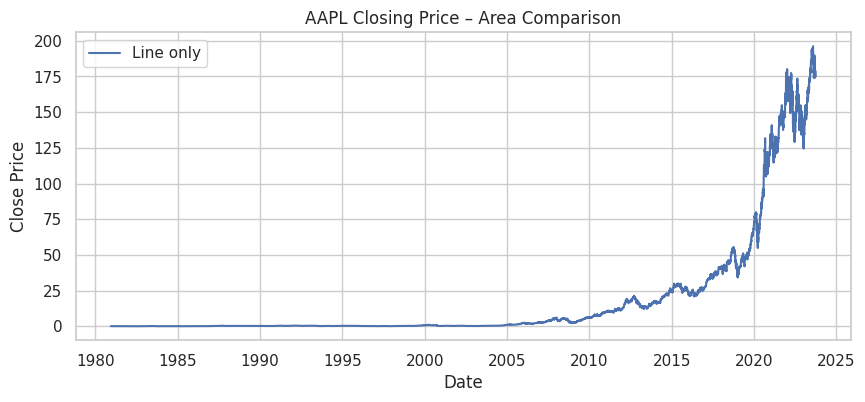

In [48]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["Close"], color="C0", label="Line only")
#plt.fill_between(df.index, df["Close"], color="C0", alpha=0.2, label="Line + fill")
plt.title("AAPL Closing Price – Area Comparison")
plt.xlabel("Date"); plt.ylabel("Close Price")
plt.legend()
plt.show()


# **3.2 Line Graph: Filled Area**

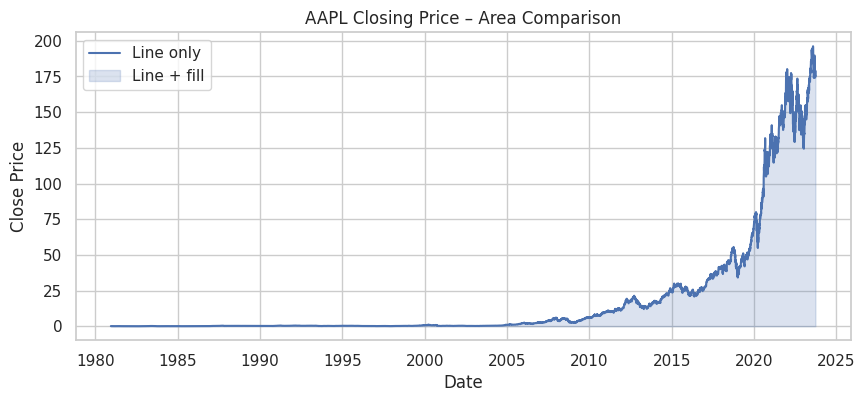

In [52]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["Close"], color="C0", label="Line only")
plt.fill_between(df.index, df["Close"], color="C0", alpha=0.2, label="Line + fill")
plt.title("AAPL Closing Price – Area Comparison")
plt.xlabel("Date"); plt.ylabel("Close Price")
plt.legend()
plt.show()


**Comparison between plain line with an area fill for the closing price.**

Key difference: filled area emphasizes volume under the curve and gives visual weight to trends, while plain line remains sleek and minimalist.

## **Summary of Key Differences**

| Plot Type          | Highlights               | Trade-offs                         |
| ------------------ | ------------------------ | ---------------------------------- |
| Scatter            | Individual data points   | No trend line, harder to see trend |
| Line (no dots)     | Trends clearly visible   | Lacks detail on individual points  |
| Line + dots        | Shows points + trend     | Can look cluttered                 |
| Line + filled area | Trend + emphasis on area | May hide overlay details           |


# **4. Multivariate Scatter Plot in Time Series**

A multivariate scatter plot displays the relationship between multiple variables. For the `AAPL` dataset, we can visualize `Close Price` against `Date`, and then use additional variables like `Volume` to represent another dimension through color or size.

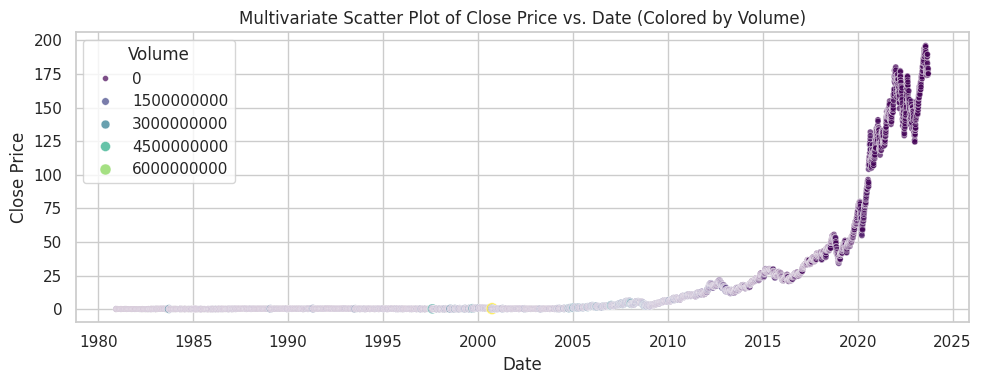

In [53]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df.index, y='Close', hue='Volume', size='Volume', data=df, palette='viridis', alpha=0.7)
plt.title('Multivariate Scatter Plot of Close Price vs. Date (Colored by Volume)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

Now, we can visualize `Volume` against `Date`, and then use additional variables like `Close` price to represent another dimension through color or size.

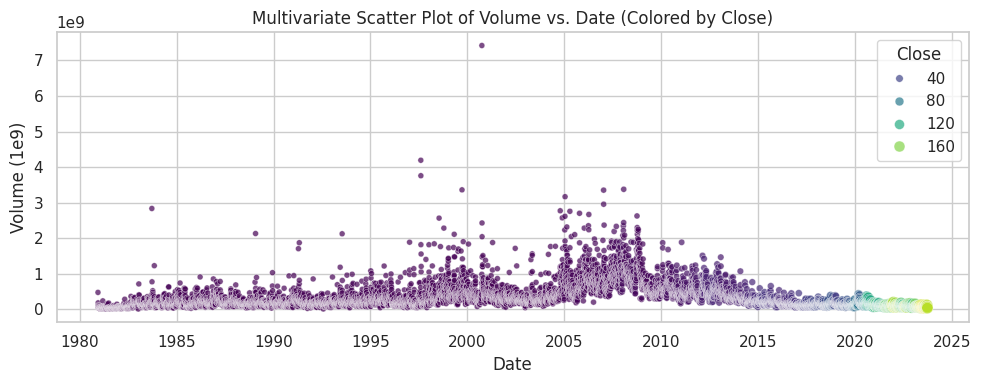

In [54]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df.index, y='Volume', hue='Close', size='Close', data=df, palette='viridis', alpha=0.7)
plt.title('Multivariate Scatter Plot of Volume vs. Date (Colored by Close)')
plt.xlabel('Date')
plt.ylabel('Volume (1e9)')
plt.grid(True)
plt.tight_layout()
plt.show()

# **5. Multivariate Line Graph for Time Series: with dots, without dots**

Multivariate line graphs are excellent for showing the trends of multiple variables over time on the same axes. This allows for direct comparison of their movements and patterns.

The first plot shows the `Open`, `High`, `Low`, and `Close` prices of `APPL` stock over time, with markers (dots) at each data point.


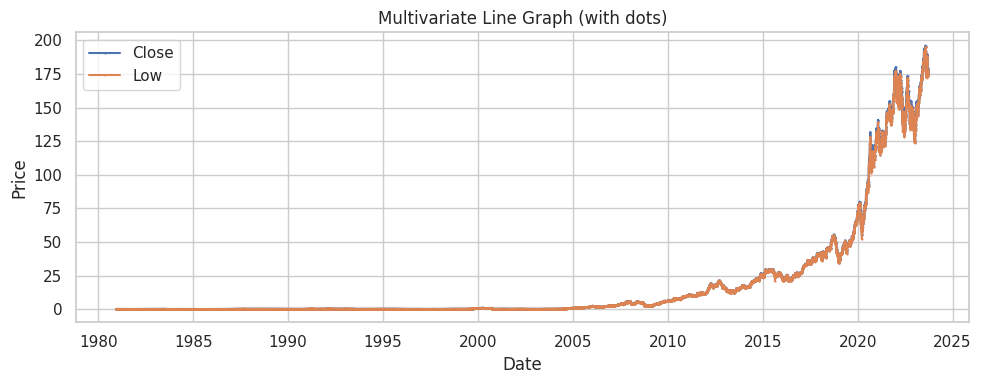

In [55]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Close'], label='Close', marker='o', markersize=0.5)
plt.plot(df.index, df['Low'], label='Low', marker='o', markersize=0.5)
plt.title('Multivariate Line Graph (with dots)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

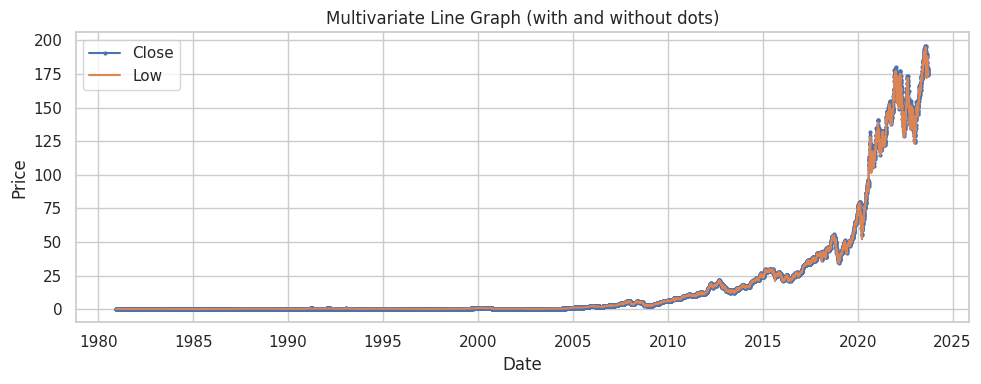

In [56]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Close'], label='Close', marker='o', markersize=2)
plt.plot(df.index, df['Low'], label='Low')
plt.title('Multivariate Line Graph (with and without dots)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

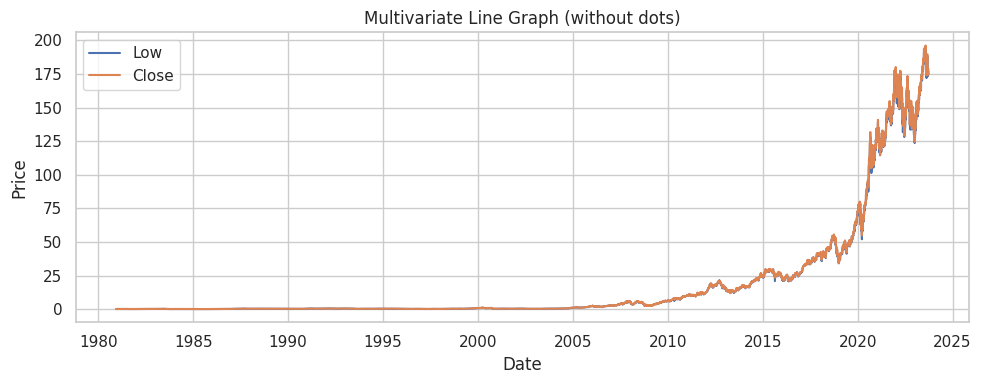

In [29]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Low'], label='Low')
plt.plot(df.index, df['Close'], label='Close')
plt.title('Multivariate Line Graph (without dots)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

So, if attributes values are within a similar range, then Line plot visualizations will not be helpful with or without dots.

# **6. Time Series Showing Independent and Dependent Variables: Different Variations of Data Visualization and Their Comparison**

In time series analysis, time (`Date` in this case) is almost always the independent variable, and the observed metrics (like `Close` Price, `Volume`, etc.) are the dependent variables.


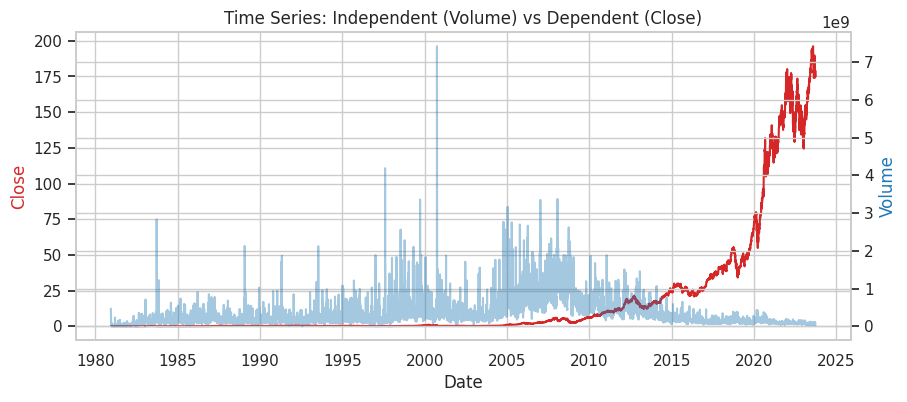

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = "tab:red"
ax1.set_xlabel("Date"); ax1.set_ylabel("Close", color=color)
ax1.plot(df.index, df["Close"], color=color)
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Volume", color=color)
ax2.plot(df.index, df["Volume"], color=color, alpha=0.4)
plt.title("Time Series: Independent (Volume) vs Dependent (Close)")
plt.show()

# **7. Smoothing of Time Series**

Time series smoothing techniques are used to remove noise and highlight underlying trends or patterns in data.

## **7.a Average Smoothing**

Average smoothing (also known as simple moving average) calculates the mean of the data points within a specified window (e.g., 5 days, 100 days). This effectively smooths out short-term fluctuations.

In [82]:
df['5_day_avg'] = df['Close'].rolling(window=5).mean()
print(df['5_day_avg'].head(10)),
print(df['Close'].head(10))

Date
1980-12-12 05:00:00+00:00         NaN
1980-12-15 05:00:00+00:00         NaN
1980-12-16 05:00:00+00:00         NaN
1980-12-17 05:00:00+00:00         NaN
1980-12-18 05:00:00+00:00    0.092531
1980-12-19 05:00:00+00:00    0.092186
1980-12-22 05:00:00+00:00    0.093828
1980-12-23 05:00:00+00:00    0.097720
1980-12-24 05:00:00+00:00    0.102303
1980-12-26 05:00:00+00:00    0.108443
Name: 5_day_avg, dtype: float64
Date
1980-12-12 05:00:00+00:00    0.099450
1980-12-15 05:00:00+00:00    0.094261
1980-12-16 05:00:00+00:00    0.087343
1980-12-17 05:00:00+00:00    0.089504
1980-12-18 05:00:00+00:00    0.092099
1980-12-19 05:00:00+00:00    0.097720
1980-12-22 05:00:00+00:00    0.102476
1980-12-23 05:00:00+00:00    0.106800
1980-12-24 05:00:00+00:00    0.112421
1980-12-26 05:00:00+00:00    0.122799
Name: Close, dtype: float64


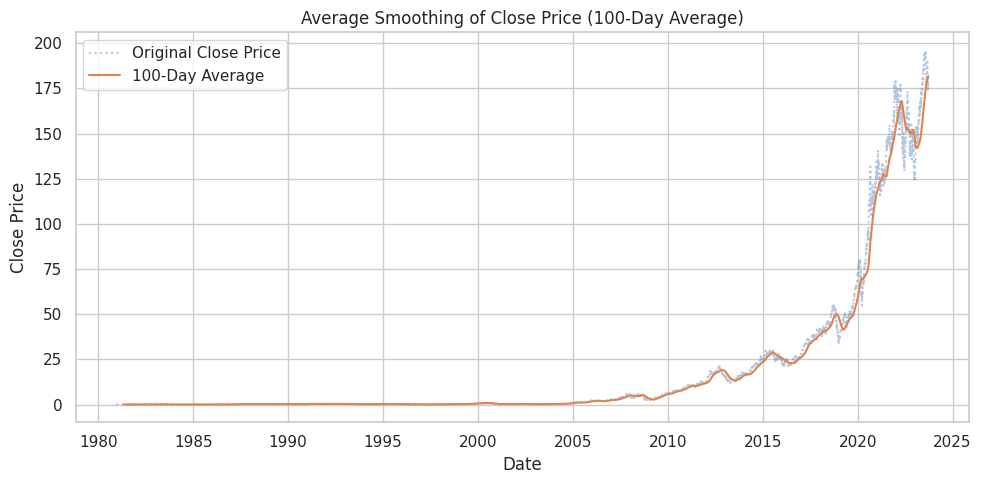

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Original Close Price', linestyle=':', alpha=0.4)

df['100_day_avg'] = df['Close'].rolling(window=100).mean()
plt.plot(df.index, df['100_day_avg'], label='100-Day Average', linestyle='-')
plt.title('Average Smoothing of Close Price (100-Day Average)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

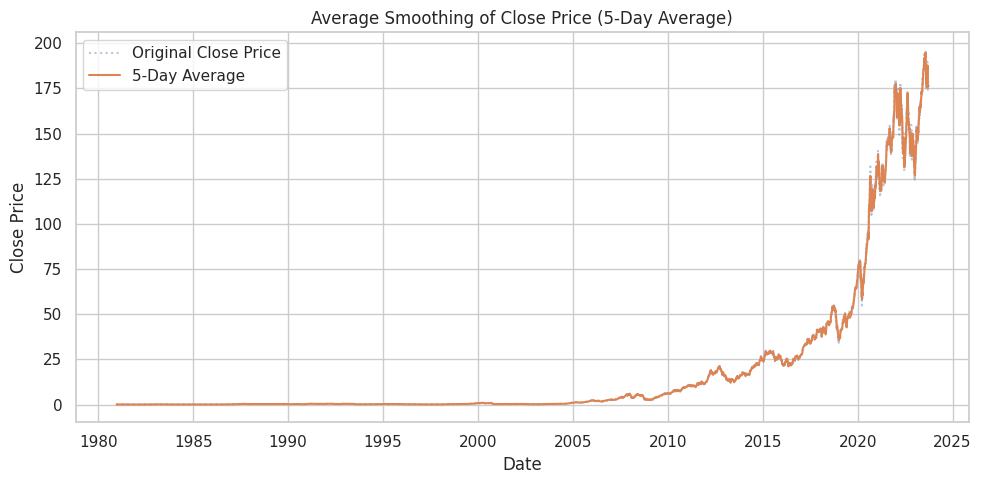

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Original Close Price', linestyle=':', alpha=0.4)

df['5_day_avg'] = df['Close'].rolling(window=5).mean()
plt.plot(df.index, df['5_day_avg'], label='5-Day Average', linestyle='-')
plt.title('Average Smoothing of Close Price (5-Day Average)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **7.b LOESS (Locally Estimated Scatterplot Smoothing)**

LOESS (Locally Estimated Scatterplot Smoothing) is a non-parametric regression method that fits simple models to localized subsets of the data to produce a smooth curve. It's flexible and doesn't require a specific function to be fitted to the data. The plot compares the original Close Price with LOESS smoothing applied with different frac (fraction of data used for local regression) values.

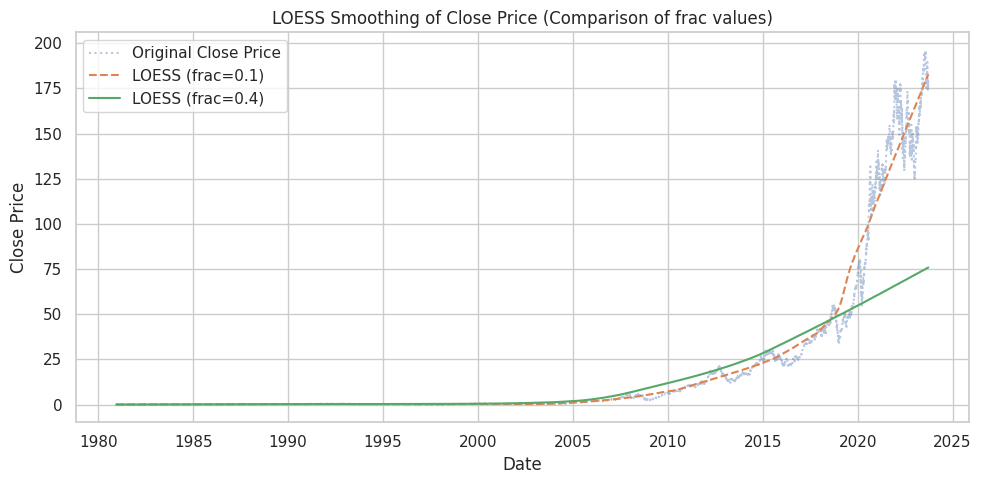

In [78]:
from statsmodels.nonparametric.smoothers_lowess import lowess

x_numeric = np.arange(len(df.index))
loess_smoothed_01 = lowess(df['Close'], x_numeric, frac=0.1)
loess_smoothed_02 = lowess(df['Close'], x_numeric, frac=0.4)

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Original Close Price', linestyle=':', alpha=0.4)
plt.plot(df.index, loess_smoothed_01[:, 1], label='LOESS (frac=0.1)', linestyle='--')
plt.plot(df.index, loess_smoothed_02[:, 1], label='LOESS (frac=0.4)', linestyle='-')
plt.title('LOESS Smoothing of Close Price (Comparison of frac values)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **8. Spline for Smoothing**

Spline interpolation is a method of constructing a smooth curve that passes through a given set of data points. A cubic spline, as used here, uses piecewise cubic polynomials. This smoothing technique generates a very smooth curve that interpolates the data, meaning it goes directly through the data points rather than averaging them.

Let's include additional libraries required for Spline.

In [79]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.linear_model import LinearRegression
from scipy.interpolate import CubicSpline

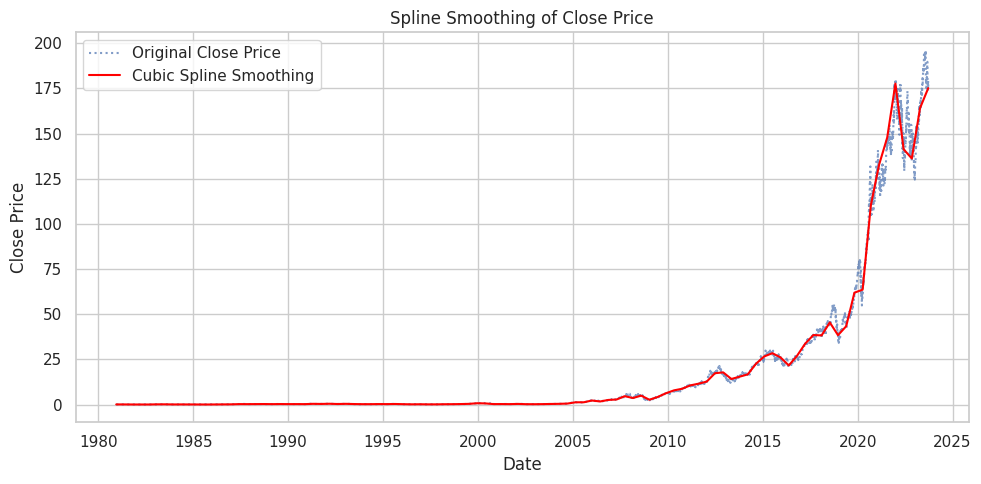

In [85]:
df['Date_numeric'] = (df.index - df.index.min()).days
cs = CubicSpline(df['Date_numeric'], df['Close'])
x_spline = np.linspace(df['Date_numeric'].min(), df['Date_numeric'].max(), 100)
dates_spline = df.index.min() + pd.to_timedelta(x_spline, unit='D')

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Original Close Price', linestyle=':', alpha=0.7)
plt.plot(dates_spline, cs(x_spline), label='Cubic Spline Smoothing', color='red', linestyle='-')
plt.title('Spline Smoothing of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **Key Differences from other smoothing methods:**

* Interpolation vs. Averaging: Unlike moving averages or LOESS, which average or locally fit models to smooth the data (and thus don't necessarily pass through every original point), splines interpolate the data. This means the smoothed curve will pass through every original data point.

* Smoothness: Splines generally produce very smooth curves, making them excellent for visualizing the overall shape and trend without the jaggedness of the original data. They are particularly useful when you need a continuous, differentiable representation of the underlying trend.

*Created by [Prachuryya Kaushik](https://www.iitg.ac.in/cse/student-pages/k.prachuryya) under the guidance of [Prof. Ashish Anand](https://www.iitg.ac.in/anand.ashish//)*